# classification using convolutional neural networks

In [64]:
import warnings
warnings.filterwarnings('ignore')

from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D

from keras.utils.visualize_util import plot
from keras.utils import np_utils

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as img
plt.style.use('ggplot')

import numpy as np
import pandas as pd

Set batch_size (number of examples in one pass), number of classes, and total epoch size

In [2]:
batch_size = 32
nb_classes = 10
nb_epoch = 100

In [3]:
img_rows, img_cols = 32, 32
img_channels = 3
classes=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

Load CIFAR dataset. Also for the purpose of learning I am only using 1000 images to train the network and then testing on 100 images

In [4]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [5]:
X_train=X_train[0:1000]
y_train=y_train[0:1000]
X_test=X_test[0:100]
y_test=y_test[0:100]

In [6]:
print('X_train shape', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
print(X_train.shape[1:])

X_train shape (1000, 32, 32, 3)
1000 train samples
100 test samples
(32, 32, 3)


dog


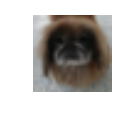

In [7]:
plt.figure(figsize=(1,1))
plt.axis('off')
plt.imshow(X_train[999])
print(classes[y_train[999]])

Converting class vector to binary encoding matrix

In [8]:
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)
# print(Y_test)

Creating convolutional network (adding layers & parameters)

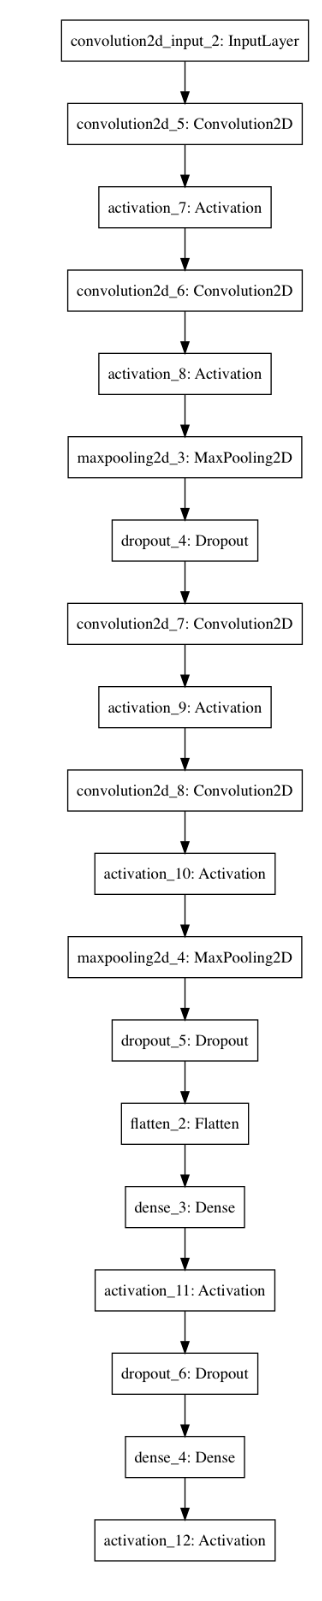

In [73]:
model = Sequential()
model.add(Convolution2D(32,3,3,border_mode='same',input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(Convolution2D(32,3,3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Convolution2D(64,3,3,border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(64,3,3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

plt.figure(figsize=(50,20))
plt.axis('off')
plot(model, to_file='model.png')
plt.imshow(plt.imread('model.png'))

In [10]:
# using cross entropy loss function 
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [11]:
# Normalizing
X_train=X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [12]:
results=model.fit(X_train, Y_train,
              batch_size=batch_size,
              nb_epoch=nb_epoch,
              validation_data=(X_test, Y_test),
              shuffle=True)

Not using data augmentation.
Train on 1000 samples, validate on 100 samples
Epoch 1/100
1000/1000 [==============================] - 8s - loss: 2.3047 - acc: 0.1170 - val_loss: 3.1088 - val_acc: 0.0600
Epoch 2/100
1000/1000 [==============================] - 7s - loss: 2.2379 - acc: 0.1890 - val_loss: 2.0299 - val_acc: 0.3700
Epoch 3/100
1000/1000 [==============================] - 8s - loss: 2.0477 - acc: 0.2770 - val_loss: 2.3580 - val_acc: 0.2100
Epoch 4/100
1000/1000 [==============================] - 8s - loss: 1.9063 - acc: 0.3030 - val_loss: 1.9332 - val_acc: 0.3400
Epoch 5/100
1000/1000 [==============================] - 7s - loss: 1.8193 - acc: 0.3400 - val_loss: 1.8284 - val_acc: 0.3400
Epoch 6/100
1000/1000 [==============================] - 8s - loss: 1.6931 - acc: 0.3980 - val_loss: 2.0034 - val_acc: 0.3400
Epoch 7/100
1000/1000 [==============================] - 7s - loss: 1.6573 - acc: 0.3980 - val_loss: 2.0190 - val_acc: 0.2400
Epoch 8/100
1000/1000 [===================

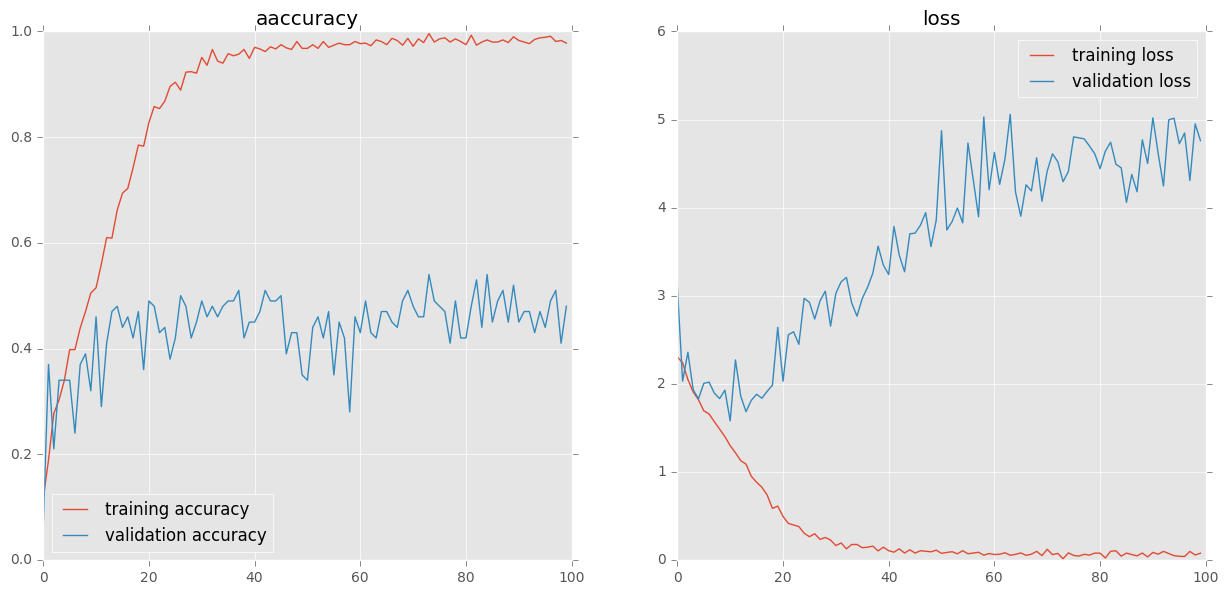

In [59]:
plt.figure(figsize=(15,15))
plt.subplot(221)
plt.title('aaccuracy')
plt.plot(results.history['acc'], label='training accuracy')
plt.plot(results.history['val_acc'], label='validation accuracy')
matplotlib.pylab.legend(loc='top left')
plt.subplot(222)
plt.title('loss')
plt.plot(results.history['loss'], label='training loss')
plt.plot(results.history['val_loss'], label='validation loss')
matplotlib.pylab.legend(loc='bottom left')